In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
ids_df = pd.read_csv("IDS_mapping.csv")
df = pd.read_csv("diabetic_data.csv")

In [3]:
#splitting data of ids file
admission_type_id_df = ids_df.iloc[:8]

discharge_disposition_id_df = ids_df.iloc[10:40]
discharge_disposition_id_df = discharge_disposition_id_df.rename(columns={'admission_type_id': 'discharge_disposition_id'})


admission_source_id_df = ids_df.iloc[42:]
admission_source_id_df = admission_source_id_df.rename(columns={'admission_type_id': 'admission_source_id'})


In [4]:
discharge_disposition_id_df

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [5]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


### Data Statistics

1. 30248 repeated patients
2. all unique encounter_id
3. 2273 patients with unknown race marked by '?'
4. 3 records with 'Unknown/Invalid' gender
5. all records of age
6. 98569 unknown weights marked by '?'
7. 9 admission_type_id
8. discharge_disposition_id {21, 26} missing
9. admission_source_id {12, 15, 16, 18, 19, 21, 23, 24} missing
10. Integer: number of days between admission and discharge
11. 40256 unknown payer_code marked by '?' with 17 distinct providers #why dataset info has 23 distinct values??
12. 49949 unknown medical_specialty marked by '?' with 72 distinct specialist  #why dataset info has 84 distinct values??
13. Number of lab tests performed during the encounter with min 1 and max 132
14. Number of procedures (other than lab tests) performed during the encounter min 0 and max 6
15. Number of distinct generic names administered during the encounter min 1 and max 81
16. Number of outpatient visits of the patient in the year preceding the encounter(vistis without hospitalizing).
17. Number of emergency visits of the patient in the year preceding the encounter
18. The number of times a patient is admitted to a hospital for medical care
19. The primary diagnosis (coded as first three digits of ICD9); 717 distinct values #why dataset info has 848 distinct values??
20. Secondary diagnosis (coded as first three digits of ICD9); 749 distinct values #why dataset info has 923 distinct values??
21. Additional secondary diagnosis (coded as first three digits of ICD9); 790 distinct values #why dataset info has 954 distinct values??
22. Number of diagnoses entered to the system
23. Indicates the range of the result or if the test was not taken. Values: >200, >300, normal, and none if not measured
24. If the test was not taken. Values: >8 if the result was greater than 8%, >7 if the result was greater than 7% but less than 8%, normal if the result was less than 7%, and none if not measured.
25. Whether the drug was prescribed or there was a change in the dosage.
26. Whether the drug was prescribed or there was a change in the dosage.
27. Whether the drug was prescribed or there was a change in the dosage.
28. Whether the drug was prescribed or there was a change in the dosage.
29. Whether the drug was prescribed or there was a change in the dosage.
30. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 2 values
31. Whether the drug was prescribed or there was a change in the dosage.
32. Whether the drug was prescribed or there was a change in the dosage.
33. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 2 values
34. Whether the drug was prescribed or there was a change in the dosage.
35. Whether the drug was prescribed or there was a change in the dosage.
36. Whether the drug was prescribed or there was a change in the dosage.
37. Whether the drug was prescribed or there was a change in the dosage.
38. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 2 values
39. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 3 values
40. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 1 value i.e No
41. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 1 value i.e No
42. Whether the drug was prescribed or there was a change in the dosage.
43. Whether the drug was prescribed or there was a change in the dosage.
44. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 2 values
45. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 2 values
46. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 2 values
47. Whether the drug was prescribed or there was a change in the dosage. # why does dataset have 2 values
48. Indicates if there was a change in diabetic medications.
49. Indicates if there was any diabetic medication prescribed.
50. Days to inpatient readmission. {'<30', '>30', 'No'}

In [6]:
# dropping 'max_glu_serum', 'A1Cresult' columns as the null values are too high
df = df.drop(['max_glu_serum', 'A1Cresult'], axis = 1)

In [7]:
# '?' existing in the data
df.isin(['?']).sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [8]:
# print(df[df['medical_specialty'] == '?'].shape)

# # has '?' in 2273 columns

In [9]:
# dropping 'weight', 'payer_code' and 'medical_specialty' columns - a lot of '?' values exist
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [10]:
df.replace('?', np.nan, inplace = True)

In [11]:
df.isin(['?']).sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


In [12]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


In [13]:
# As we have very less rows with null values - we can drop those rows
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0


In [15]:
df.shape

(98053, 45)

In [16]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98053 non-null  int64 
 1   patient_nbr               98053 non-null  int64 
 2   race                      98053 non-null  object
 3   gender                    98053 non-null  object
 4   age                       98053 non-null  object
 5   admission_type_id         98053 non-null  int64 
 6   discharge_disposition_id  98053 non-null  int64 
 7   admission_source_id       98053 non-null  int64 
 8   time_in_hospital          98053 non-null  int64 
 9   num_lab_procedures        98053 non-null  int64 
 10  num_procedures            98053 non-null  int64 
 11  num_medications           98053 non-null  int64 
 12  number_outpatient         98053 non-null  int64 
 13  number_emergency          98053 non-null  int64 
 14  number_inpatient          

In [18]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
df['gender'].value_counts()

,count
gender,
Female,52833
Male,45219
Unknown/Invalid,1


In [20]:
df['metformin'].value_counts()

,count
metformin,
No,78808
Steady,17677
Up,1017
Down,551


In [21]:
# columns for which we need value_counts
columns_of_interest = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

# Apply value_counts to the these columns
value_counts_dict = {col: df[col].value_counts() for col in columns_of_interest}

# Print the results
for col, counts in value_counts_dict.items():
    print(f"Value counts for column '{col}':")
    print(counts)
    print()


Value counts for column 'metformin':
metformin
No        78808
Steady    17677
Up         1017
Down        551
Name: count, dtype: int64

Value counts for column 'repaglinide':
repaglinide
No        96530
Steady     1371
Up          107
Down         45
Name: count, dtype: int64

Value counts for column 'nateglinide':
nateglinide
No        97362
Steady      657
Up           23
Down         11
Name: count, dtype: int64

Value counts for column 'chlorpropamide':
chlorpropamide
No        97970
Steady       76
Up            6
Down          1
Name: count, dtype: int64

Value counts for column 'glimepiride':
glimepiride
No        93066
Steady     4488
Up          315
Down        184
Name: count, dtype: int64

Value counts for column 'acetohexamide':
acetohexamide
No        98052
Steady        1
Name: count, dtype: int64

Value counts for column 'glipizide':
glipizide
No        85769
Steady    10991
Up          752
Down        541
Name: count, dtype: int64

Value counts for column 'glyburide':

In [22]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Threshold for low variance
threshold = 0.999999999

# Identify low-variance columns
low_variance_cols = [
    col for col in categorical_columns
    if df[col].value_counts(normalize=True).max() > threshold
]

# Print low-variance columns
print(f"Low-variance columns: {low_variance_cols}")

Low-variance columns: ['examide', 'citoglipton', 'metformin-rosiglitazone']


In [23]:
# dropping these columns which have very very low variance
df = df.drop(['examide', 'citoglipton', 'metformin-rosiglitazone'], axis =1)

In [24]:
# Summing all the visits together
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [25]:
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis =1, inplace = True)

In [26]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [27]:
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

,count
numchange,
0,71310
1,25350
2,1281
3,107
4,5


Few category types can be replaced by the other as they almost mean the same

In [28]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

In [29]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

In [30]:
df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [31]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

<ipython-input-31-f2f54d259688>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('No', 0)
<ipython-input-31-f2f54d259688>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
<ipython-input-31-f2f54d259688>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('

In [32]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

<ipython-input-32-4694c4241c95>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)


,count
age,
8,25306
7,21809
9,16702
6,16697
5,9265
4,3548
10,2717
3,1478
2,466


In [33]:
df.shape

(98053, 41)

In [34]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'service_utilization', 'numchange'],
      dtype='object')

In [35]:
df['patient_nbr']

,patient_nbr
1,55629189
2,86047875
3,82442376
4,42519267
5,82637451
...,...
101761,100162476
101762,74694222
101763,41088789
101764,31693671


In [36]:
df['readmitted'].value_counts()

,count
readmitted,
NO,52338
>30,34649
<30,11066


In [37]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,int64
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64


In [38]:
df['diag_1'].unique()

array(['276', '648', '8', '197', '414', '428', '398', '434', '250.7',
       '157', '518', '999', '410', '682', '402', 'V57', '189', '786',
       '427', '996', '277', '584', '462', '473', '411', '174', '486',
       '998', '511', '432', '626', '295', '196', '250.6', '182', '845',
       '423', '808', '250.4', '722', '403', '784', '707', '440', '151',
       '715', '997', '198', '564', '38', '590', '578', '250.32', '433',
       '569', '185', '536', '255', '250.13', '599', '558', '574', '491',
       '560', '244', '250.03', '577', '730', '188', '824', '250.8', '332',
       '562', '291', '296', '510', '401', '263', '438', '70', '642',
       '571', '738', '593', '618', '250.42', '807', '456', '446', '572',
       '575', '250.41', '250.02', '820', '515', '780', '250.22', '995',
       '235', '250.82', '721', '787', '556', '162', '724', '282',
       '250.83', '514', 'V55', '281', '250.33', '530', '466', '435',
       '250.12', 'V53', '789', '566', '822', '191', '557', '733', '455',
    

https://en.wikipedia.org/wiki/List_of_ICD-9_codes

Find the downloaded excel for the 22 categories - level 2 splits

In [39]:
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [40]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0

In [41]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [42]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0

    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0

    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0

In [43]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0

    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0


    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [44]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,int64
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64


In [45]:
df['gender'].unique()

array([0, 1, 'Unknown/Invalid'], dtype=object)

In [46]:
df[df['gender'] == 'Unknown/Invalid'].shape[0]

1

In [47]:
df = df.drop(df[df['gender'] == 'Unknown/Invalid'].index)

In [48]:
df.drop(['race', 'diag_1', 'diag_2', 'diag_3'], axis=1, inplace = True)

In [49]:
# just for finding correlation
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

<ipython-input-49-8f5a0e140b55>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('NO', 0)


### Exploratory Data analysis

<Axes: >

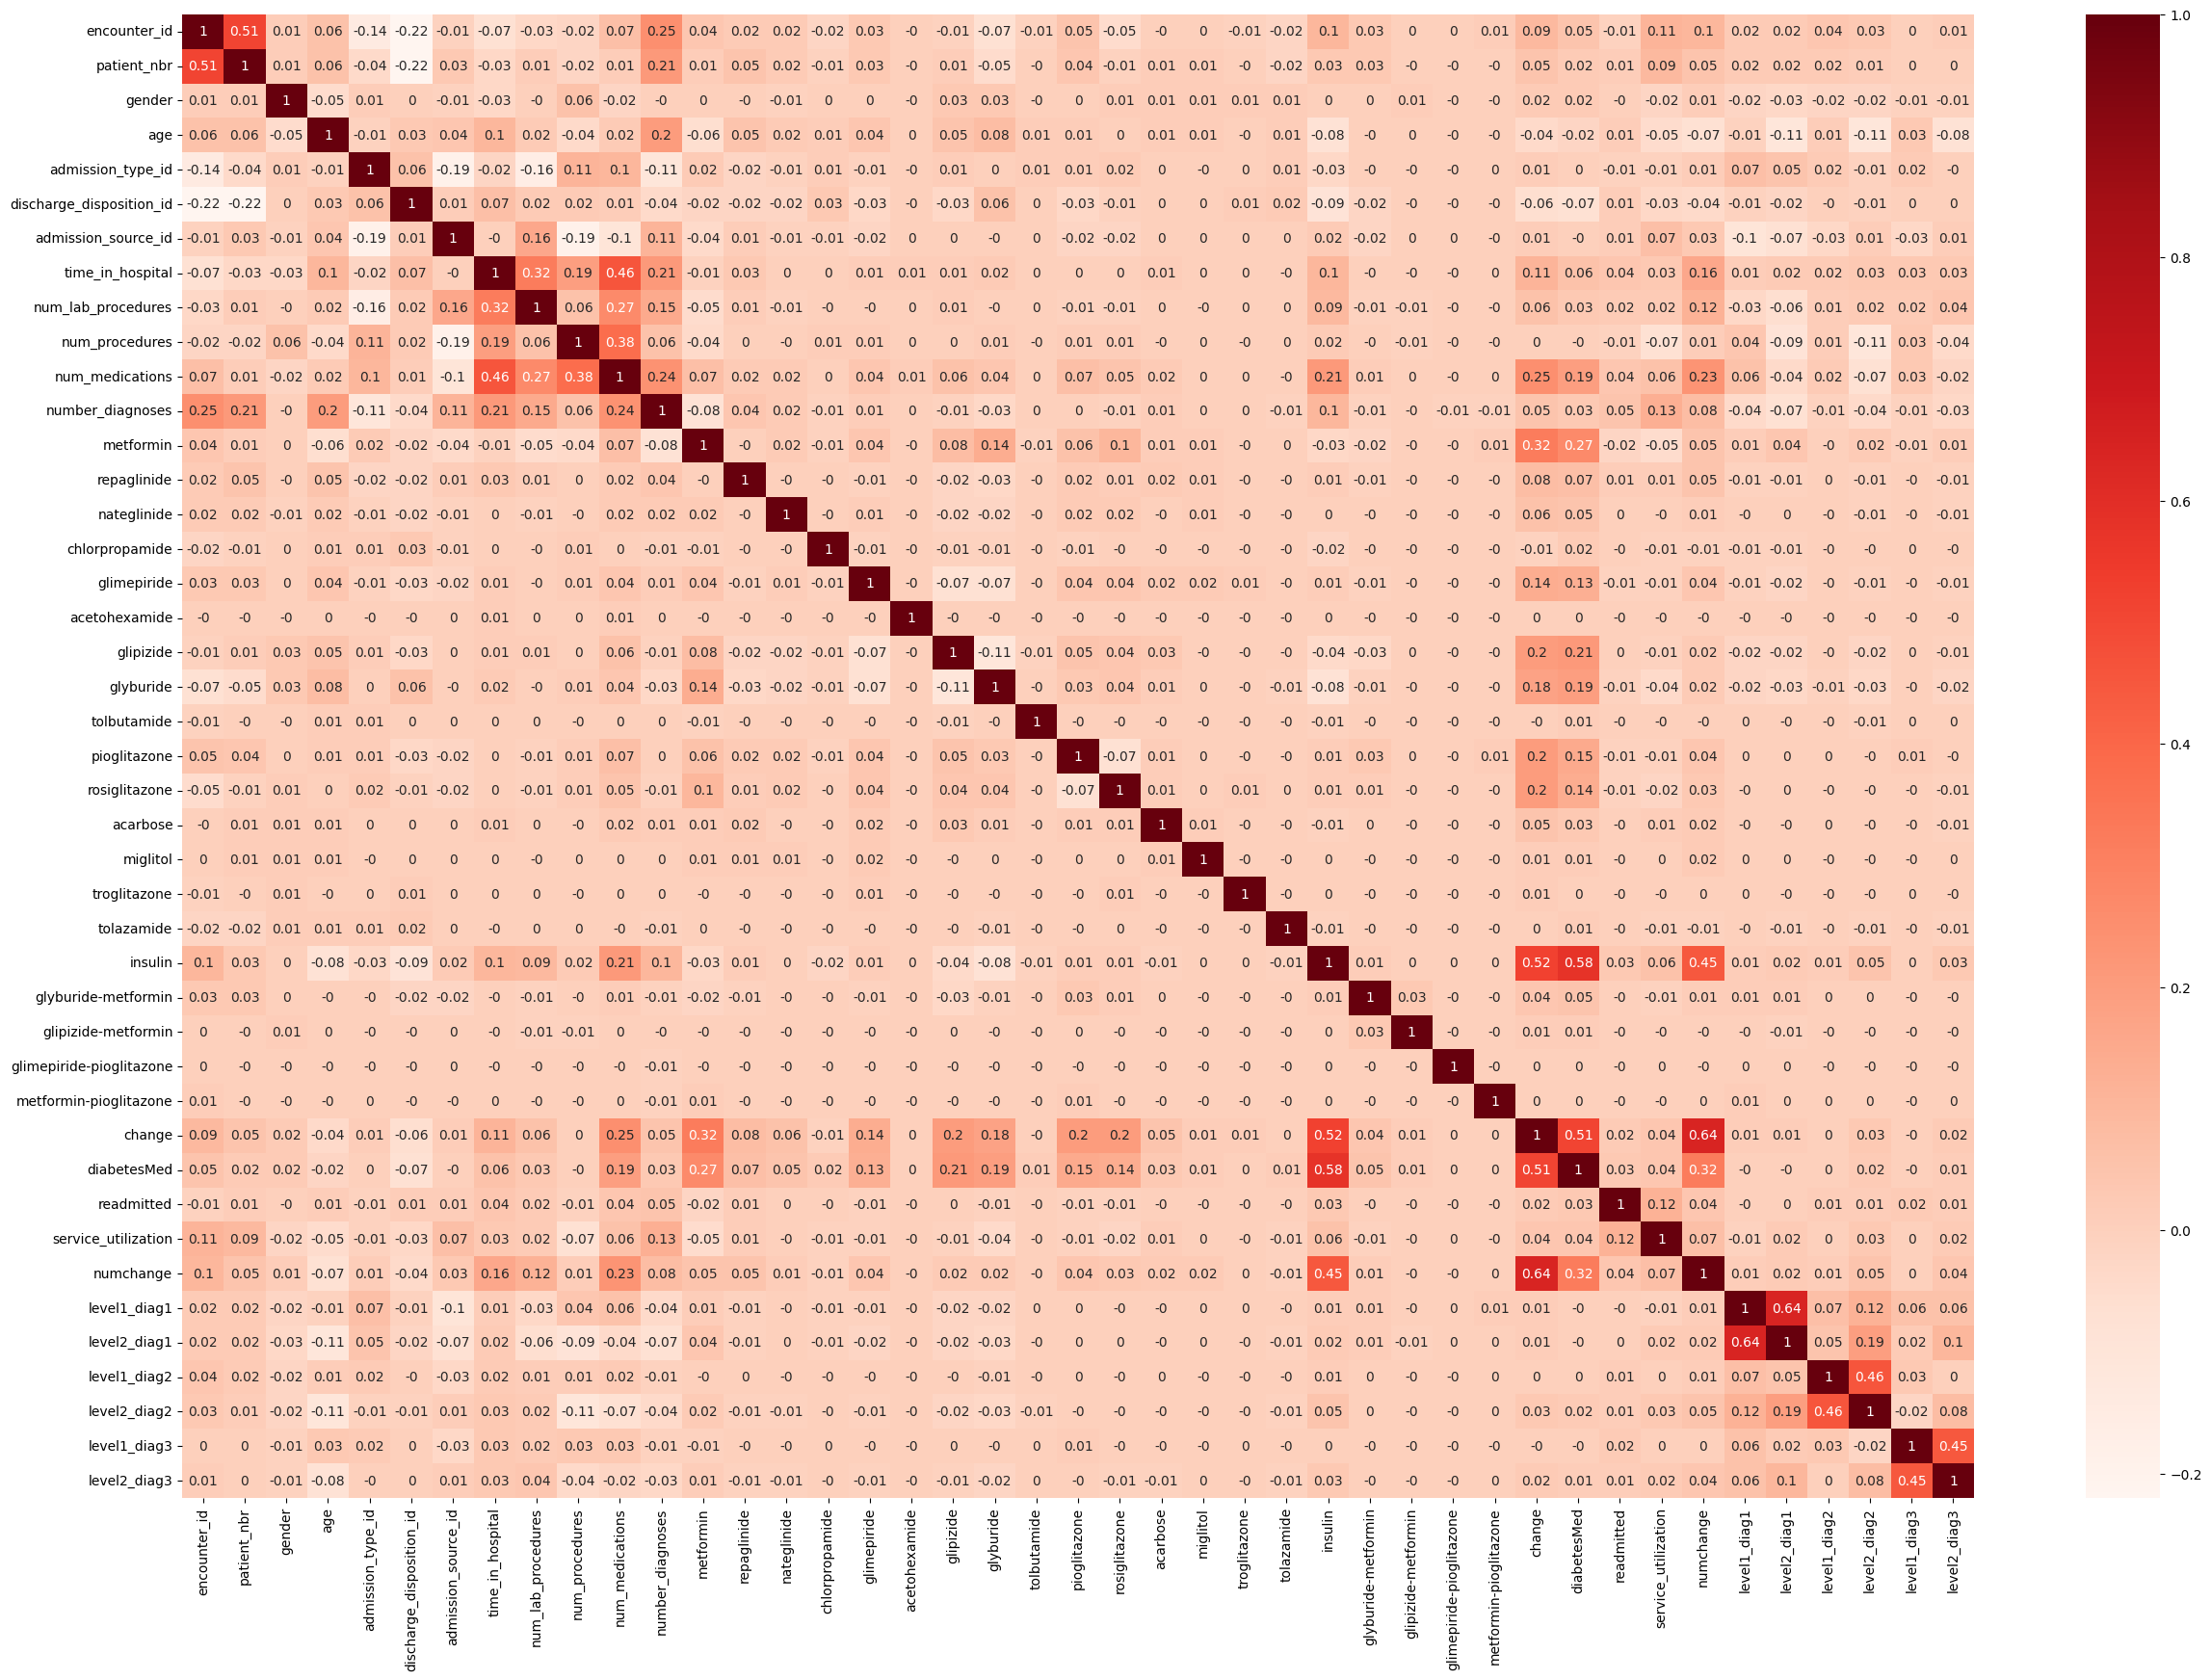

In [50]:
corr = df.corr().round(2)
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, cmap = 'Reds')

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

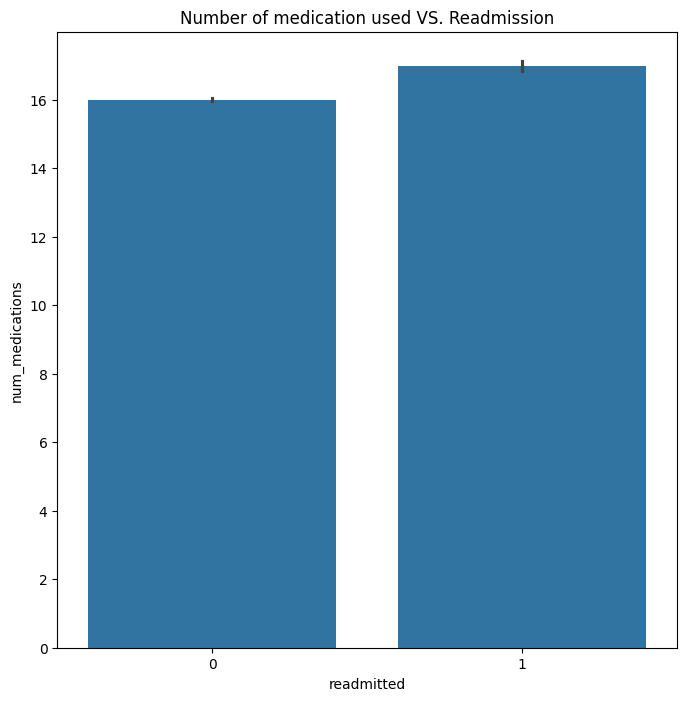

In [51]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

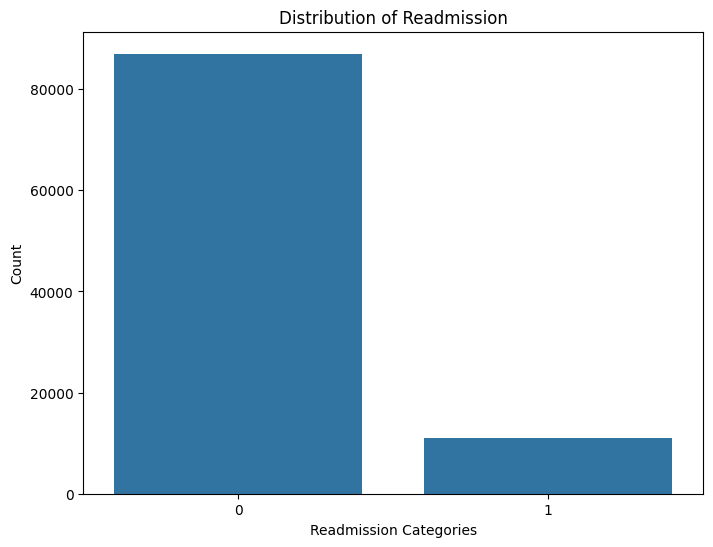

In [52]:
# Create a countplot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='readmitted')

# Set plot title and labels
plt.title('Distribution of Readmission')
plt.xlabel('Readmission Categories')
plt.ylabel('Count')

plt.show()

<ipython-input-53-6e3f62b3c878>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['readmitted'] == 0), 'time_in_hospital'], color='b', shade=True, label='Not Readmitted')
<ipython-input-53-6e3f62b3c878>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['readmitted'] == 1), 'time_in_hospital'], color='r', shade=True, label='Readmitted')


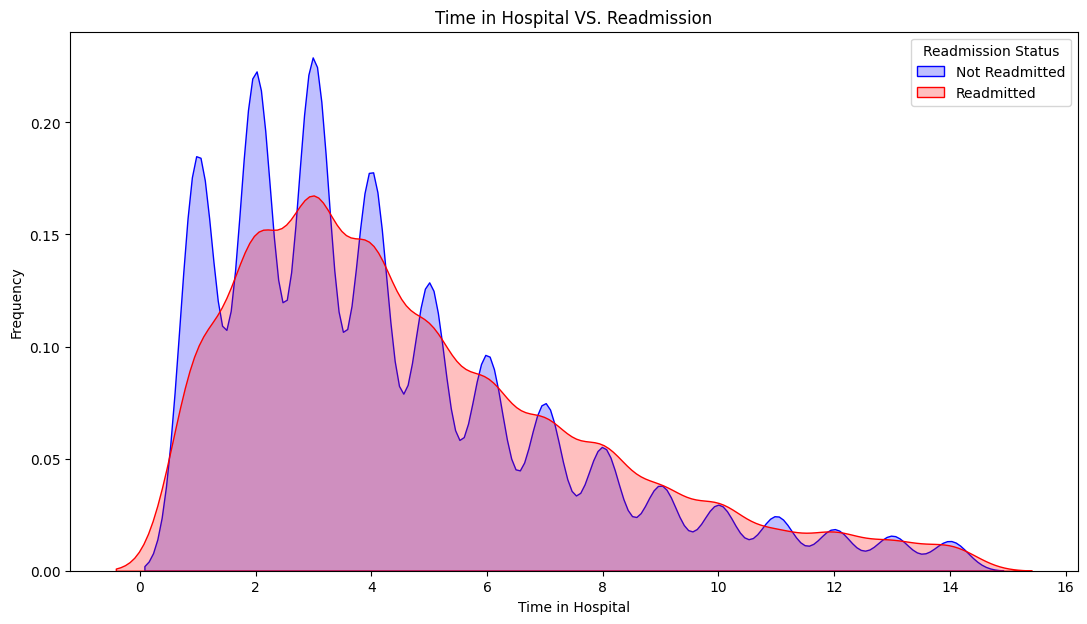

In [53]:
fig = plt.figure(figsize=(13, 7))

ax = sns.kdeplot(df.loc[(df['readmitted'] == 0), 'time_in_hospital'], color='b', shade=True, label='Not Readmitted')

ax = sns.kdeplot(df.loc[(df['readmitted'] == 1), 'time_in_hospital'], color='r', shade=True, label='Readmitted')

ax.set(xlabel='Time in Hospital', ylabel='Frequency')

plt.title('Time in Hospital VS. Readmission')

plt.legend(title='Readmission Status', loc='best')

plt.show()


Text(0.5, 1.0, 'Age of Patient VS. Readmission')

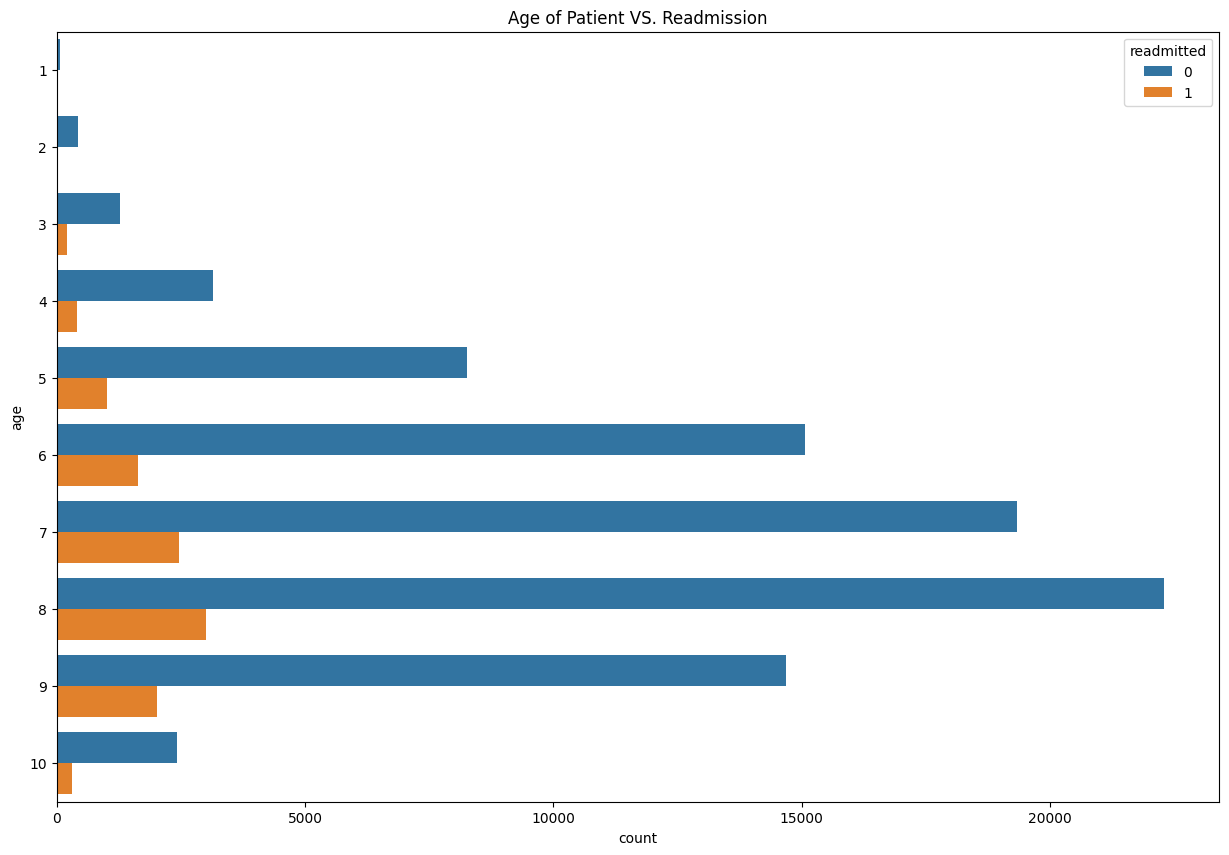

In [54]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

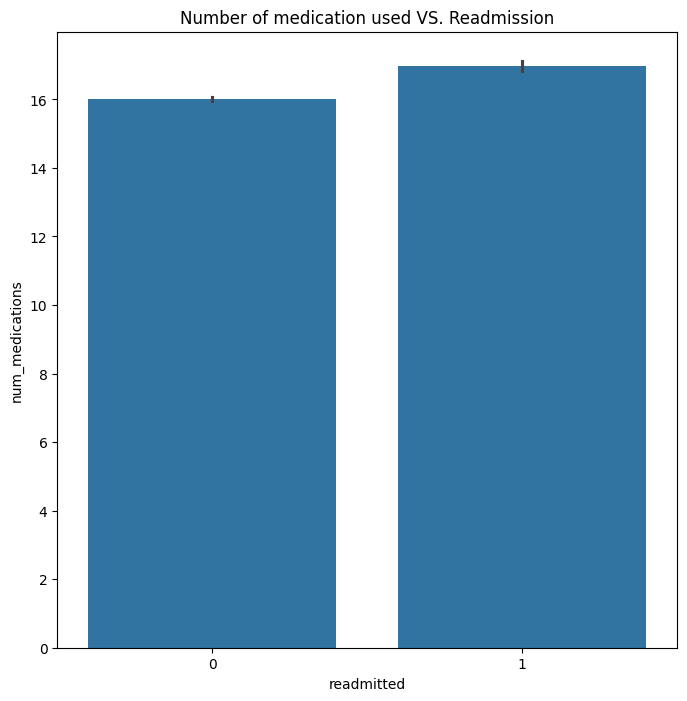

In [55]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

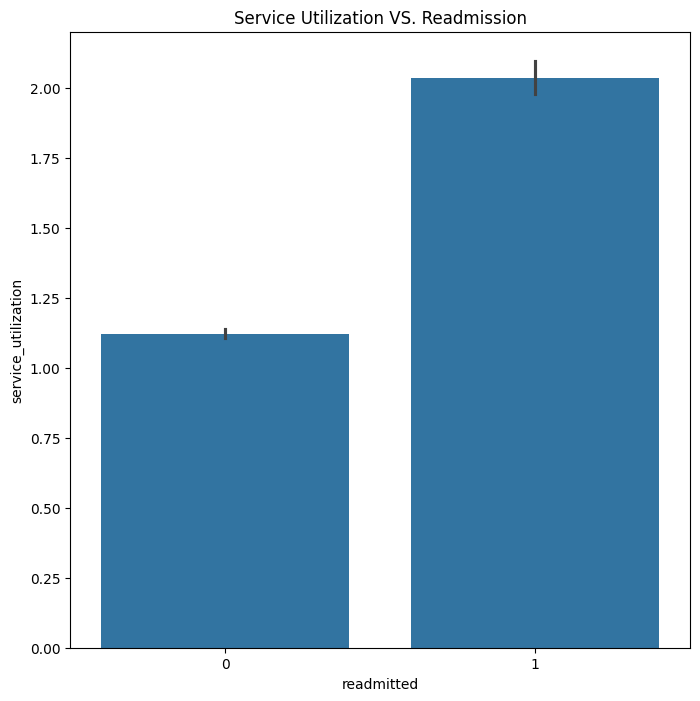

In [56]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

<ipython-input-57-217a4e5fe706>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-57-217a4e5fe706>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

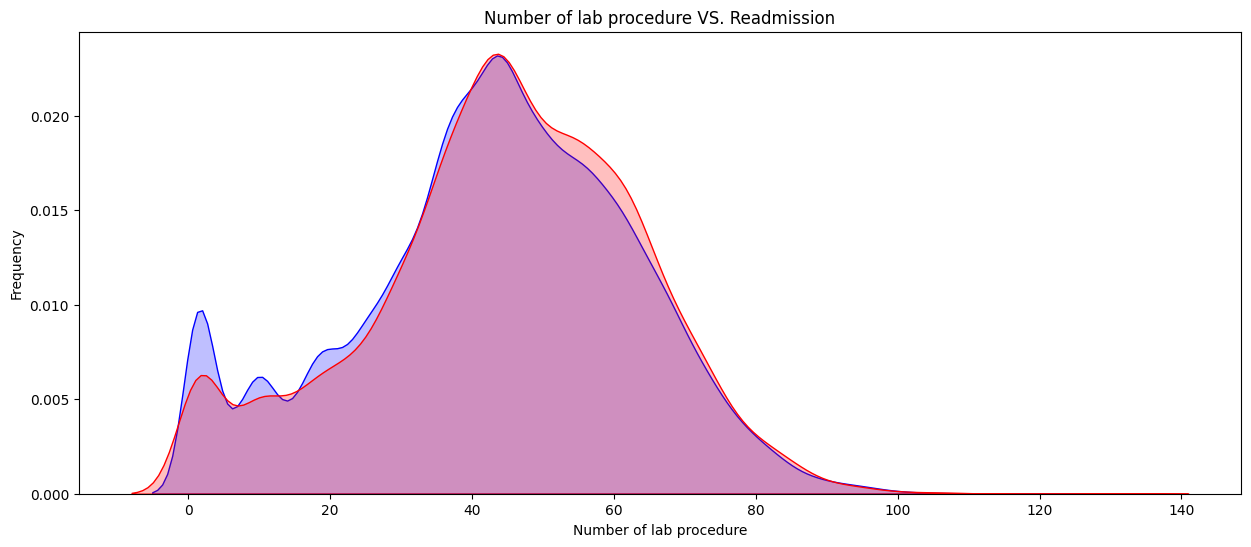

In [57]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

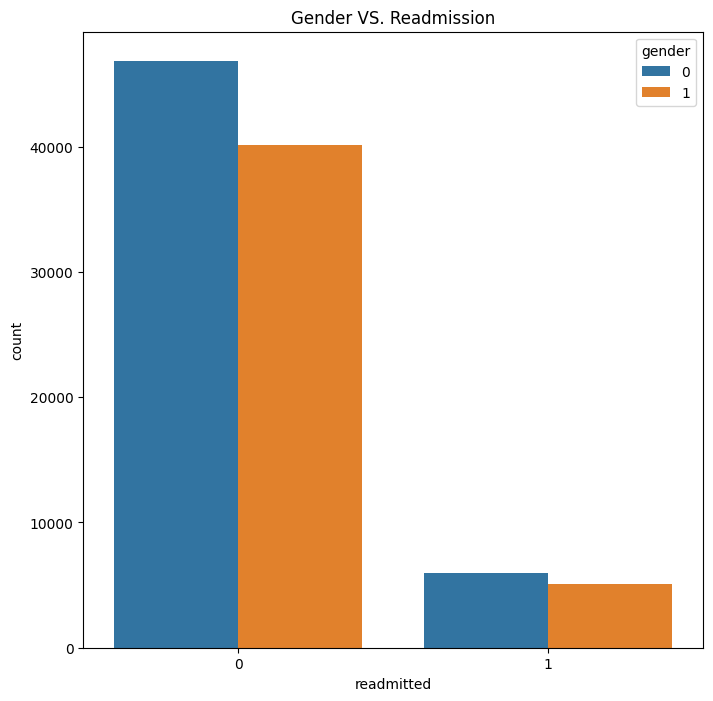

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for categorical data
fig = plt.figure(figsize=(8,8))
sns.countplot(x='readmitted', hue='gender', data=df).set_title('Gender VS. Readmission')
plt.show()